In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/drive/folders/1Holhm8sS_8bIwyDayxD0ORkK8t8qsbGm?usp=drive_link' # The shareable link


In [ ]:
!ls

drive  flowers	sample_data


In [ ]:
## Analyse the Dimensions of the data.
## Read the images, Resize the image to 128 x 128, and Get the image labels from the folder name
## NOTE: Here we are going to load only train images, we will keep that for final validation.
import os
import cv2

dataset = '/content/flowers/train'
X = []
y = []
labels = []

# list all folders inside train directory
for i in os.listdir(dataset):
    print(i)
    if i!= '.DS_Store':   #Specific to Mac
      labels.append(i)        
      for j in os.listdir(os.path.join(dataset, i)):
        # read each image inside train directory one by one
        dummy = cv2.imread(os.path.join(dataset, i, j))
        dummy = cv2.resize(dummy, (128, 128))   # Resizing can be any number - 128 is just kept for standard reference
        X.append(dummy)
        y.append(i)

tulip
rose
daisy
dandelion
sunflower


In [ ]:
import numpy as np
np.array(X).shape

(3823, 128, 128, 3)

In [ ]:
np.array(y).shape

(3823,)

[1513 1572 1755  482 3761 2973 1015 2246 1525 2136]


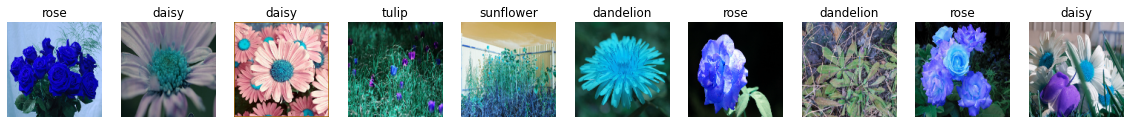

In [ ]:
# visualizing the random images in the dataset along with their labels from training dataset.

# VISUALIZATION
import matplotlib.pyplot as plt # MATPLOTLIB FOR PLOTTING
import numpy as np
rand = np.random.randint(0, len(X), 10) # Generating 10 random numbers out of total number of flowers
print(rand)
plt.figure(figsize=(20, 15))
for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    plt.imshow(X[j])  # greens, reds, blues, rgb
    plt.title("{}".format(y[j]))
    plt.axis('off')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)
print(len(X_train))
print(len(X_val))

3058
765


In [ ]:
import pandas as pd
## One hot encode the target variable
y_train = pd.get_dummies(y_train).values
y_val = pd.get_dummies(y_val).values

## Convert data from list to array
X_train = np.array(X_train)
X_val = np.array(X_val)


In [ ]:
## Normalization
X_train = X_train.astype('float32')
X_train = X_train.reshape(X_train.shape[0],128,128,3)
X_train = X_train / 255.

X_val = X_val.astype('float32')
X_val = X_val.reshape(X_val.shape[0], 128,128,3)
X_val = X_val / 255.

In [ ]:
## Check the min and max values after normalization
print('Train data------------','max:',X_train.max(), 'min:',X_train.min())
print('Validation data-------','max:',X_val.max(), 'min:',X_val.min())

Train data------------ max: 1.0 min: 0.0
Validation data------- max: 1.0 min: 0.0


In [ ]:
# DATA SET SHAPE AND SIZE
print('\nTraining data : ', X_train.shape, y_train.shape)  # TRAIN
print('\nValidation data : ', X_val.shape, y_val.shape)       # Validation


Training data :  (3058, 128, 128, 3) (3058, 5)

Validation data :  (765, 128, 128, 3) (765, 5)


In [ ]:
## Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

In [ ]:
# Initialising the CNN classifier
classifier = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu', padding = 'same'))
# Add a Max Pooling layer of size 2X2
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 64 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 128 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier.add(Dense(units = 512, activation = 'relu'))
# Adding dropout with probability 0.4
classifier.add(Dropout(0.4))

# Adding a fully connected layer with 128 neurons
classifier.add(Dense(units = 128, activation = 'relu'))

# The final output layer with 5 neuron to predict the categorical classification
classifier.add(Dense(units = 5, activation = 'softmax'))

In [ ]:
## Complie the model and get the summary of the model architecture
opt = Adam()
classifier.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

In [ ]:
## Fit the model
cnn_model_1 = classifier.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_val), initial_epoch=0)

Epoch 1/10
96/96 [==============================] - 15s 33ms/step - loss: 1.4546 - accuracy: 0.3653 - val_loss: 1.1355 - val_accuracy: 0.5765
Epoch 2/10
96/96 [==============================] - 2s 26ms/step - loss: 1.1251 - accuracy: 0.5314 - val_loss: 0.9625 - val_accuracy: 0.6288
Epoch 3/10
96/96 [==============================] - 2s 26ms/step - loss: 0.9627 - accuracy: 0.6102 - val_loss: 0.8610 - val_accuracy: 0.6784
Epoch 4/10
96/96 [==============================] - 2s 26ms/step - loss: 0.8344 - accuracy: 0.6799 - val_loss: 0.8469 - val_accuracy: 0.6941
Epoch 5/10
96/96 [==============================] - 3s 26ms/step - loss: 0.7169 - accuracy: 0.7217 - val_loss: 0.8428 - val_accuracy: 0.6941
Epoch 6/10
96/96 [==============================] - 3s 26ms/step - loss: 0.5395 - accuracy: 0.8031 - val_loss: 0.9257 - val_accuracy: 0.6902
Epoch 7/10
96/96 [==============================] - 2s 26ms/step - loss: 0.3597 - accuracy: 0.8656 - val_loss: 1.0313 - val_accuracy: 0.6993
Epoch 8/10
9

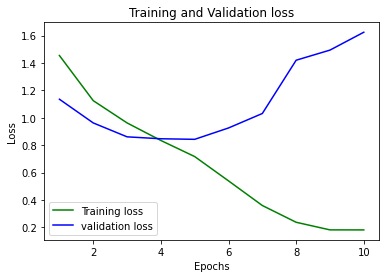

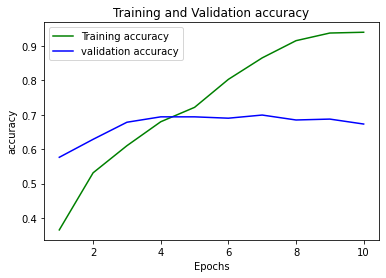

In [ ]:
# Accuracy and Loss plots 

EPOCH=10
epochs = range(1,EPOCH+1)

loss_train = cnn_model_1.history['loss']
loss_val = cnn_model_1.history['val_loss']
Acc_train = cnn_model_1.history['accuracy']
Acc_val = cnn_model_1.history['val_accuracy']

# Loss Vs Epochs
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy Vs Epochs
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# model architecture building

Classifier_2 = Sequential()

Classifier_2.add(Convolution2D(32, (3,3), padding='same', activation='relu', input_shape=(128,128,3)))
Classifier_2.add(BatchNormalization())

Classifier_2.add(Convolution2D(64, (3,3), padding='same', activation='relu'))
Classifier_2.add(BatchNormalization())
Classifier_2.add(MaxPooling2D(pool_size=(2,2)))
Classifier_2.add(Dropout(0.3))

Classifier_2.add(Convolution2D(64, (3,3), padding='same', activation='relu'))
Classifier_2.add(BatchNormalization())

Classifier_2.add(Convolution2D(128, (3,3), padding='same', activation='relu'))
Classifier_2.add(BatchNormalization())
Classifier_2.add(MaxPooling2D(pool_size=(2,2)))
Classifier_2.add(Dropout(0.5))

Classifier_2.add(Convolution2D(128, (3,3), padding='same', activation='relu'))
Classifier_2.add(BatchNormalization())

Classifier_2.add(Convolution2D(256, (3,3), padding='same', activation='relu'))
Classifier_2.add(BatchNormalization())
Classifier_2.add(MaxPooling2D(pool_size=(2,2)))
Classifier_2.add(Dropout(0.5))

Classifier_2.add(Flatten())

# fully connected layer
Classifier_2.add(Dense(128, activation='relu'))
Classifier_2.add(BatchNormalization())
Classifier_2.add(Dropout(0.5))

# Classification layer
Classifier_2.add(Dense(units=5, activation='softmax'))   

In [ ]:
## Complie the model and get the summary of the model architecture
opt = Adam()
Classifier_2.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
Classifier_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                      

In [ ]:
## Fit the model
cnn_model_2 = Classifier_2.fit(X_train, y_train, epochs = 30, validation_data = (X_val, y_val), initial_epoch=0) 

Epoch 1/30
96/96 [==============================] - 12s 120ms/step - loss: 1.2868 - accuracy: 0.5062 - val_loss: 2.7465 - val_accuracy: 0.2601
Epoch 2/30
96/96 [==============================] - 8s 86ms/step - loss: 1.4753 - accuracy: 0.4663 - val_loss: 2.8240 - val_accuracy: 0.2941
Epoch 3/30
96/96 [==============================] - 8s 87ms/step - loss: 1.3414 - accuracy: 0.4738 - val_loss: 2.5475 - val_accuracy: 0.3660
Epoch 4/30
96/96 [==============================] - 9s 91ms/step - loss: 1.1150 - accuracy: 0.5621 - val_loss: 1.8279 - val_accuracy: 0.4052
Epoch 5/30
96/96 [==============================] - 8s 87ms/step - loss: 0.9984 - accuracy: 0.6128 - val_loss: 1.0747 - val_accuracy: 0.5739
Epoch 6/30
96/96 [==============================] - 8s 87ms/step - loss: 0.8725 - accuracy: 0.6671 - val_loss: 0.9783 - val_accuracy: 0.6131
Epoch 7/30
96/96 [==============================] - 9s 89ms/step - loss: 0.7739 - accuracy: 0.7047 - val_loss: 0.8283 - val_accuracy: 0.6824
Epoch 8/30


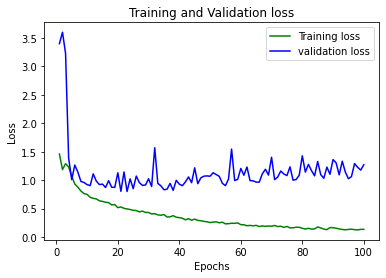

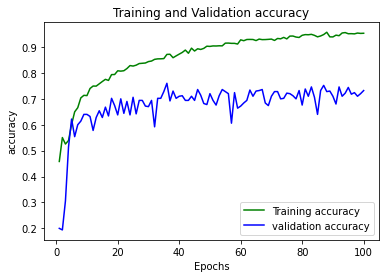

In [ ]:
# Accuracy and Loss plots 

EPOCH=30
epochs = range(1,EPOCH+1)

loss_train = cnn_model_2.history['loss']
loss_val = cnn_model_2.history['val_loss']
Acc_train = cnn_model_2.history['accuracy']
Acc_val = cnn_model_2.history['val_accuracy']

# Loss Vs Epochs
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy Vs Epochs
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model

base_model = VGG16(input_shape=(128,128,3),
                   weights='imagenet',
                   include_top=False) #imports the VGG16 model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional
x = Dense(1024, activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x) #dense layer 2
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x) #dense layer 3
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
preds = Dense(5, activation='softmax')(x) #final layer with sigmoid activation

model_vgg16 = Model(inputs=base_model.input, outputs=preds)

# set the first 20 layers of the network to be non-trainable
for layer in model_vgg16.layers[:20]:
    layer.trainable=False
for layer in model_vgg16.layers[20:]:
    layer.trainable=True

# Compile the model
model_vgg16.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_vgg16.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
vgg16_history = model_vgg16.fit(x=X_train, y=y_train, batch_size=64, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
48/48 [==============================] - 14s 225ms/step - loss: 1.5428 - accuracy: 0.4307 - val_loss: 1.1002 - val_accuracy: 0.6693
Epoch 2/50
48/48 [==============================] - 6s 127ms/step - loss: 1.0084 - accuracy: 0.6305 - val_loss: 0.8660 - val_accuracy: 0.7386
Epoch 3/50
48/48 [==============================] - 6s 128ms/step - loss: 0.8332 - accuracy: 0.6874 - val_loss: 0.7755 - val_accuracy: 0.7582
Epoch 4/50
48/48 [==============================] - 6s 128ms/step - loss: 0.7709 - accuracy: 0.7155 - val_loss: 0.7214 - val_accuracy: 0.7621
Epoch 5/50
48/48 [==============================] - 6s 129ms/step - loss: 0.6880 - accuracy: 0.7459 - val_loss: 0.6143 - val_accuracy: 0.7935
Epoch 6/50
48/48 [==============================] - 6s 136ms/step - loss: 0.6385 - accuracy: 0.7665 - val_loss: 0.5830 - val_accuracy: 0.7961
Epoch 7/50
48/48 [==============================] - 6s 135ms/step - loss: 0.6048 - accuracy: 0.7744 - val_loss: 0.5798 - val_accuracy: 0.7712
Epoch

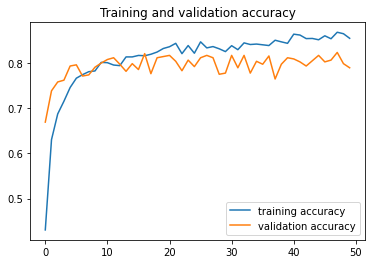

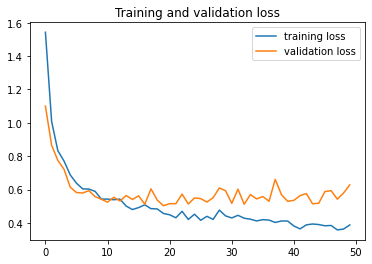

In [ ]:
## Accuracy and Loss plots

accuracy = vgg16_history.history['accuracy']
val_accuracy = vgg16_history.history['val_accuracy']
loss = vgg16_history.history['loss']
val_loss = vgg16_history.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

plt.plot(epochs, accuracy, label = 'training accuracy')
plt.plot(epochs, val_accuracy, label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot(epochs, loss, label = 'training loss')
plt.plot(epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')
plt.show()

In [ ]:
import tensorflow
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model

base_model = VGG19(input_shape=X_train[0].shape,
                   weights='imagenet',
                   include_top=False) #imports the VGG16 model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional
x = Dense(1024, activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x) #dense layer 2
x = Dense(256, activation='relu')(x) #dense layer 3
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
preds = Dense(5, activation='softmax')(x) #final layer with softmax activation

model_vgg19 = Model(inputs=base_model.input,
                    outputs=preds)

# set the first 20 layers of the network to be non-trainable
for layer in model_vgg19.layers[:20]:
    layer.trainable=False
for layer in model_vgg19.layers[20:]:
    layer.trainable=True

# Compile the model
model_vgg19.compile(optimizer=tensorflow.optimizers.Adam(learning_rate=1e-5), ## Modify Learning rate
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_vgg19.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
vgg19_history = model_vgg19.fit(x=X_train, y=y_train, batch_size=32, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
96/96 [==============================] - 9s 83ms/step - loss: 2.2037 - accuracy: 0.2112 - val_loss: 1.6064 - val_accuracy: 0.1869
Epoch 2/50
96/96 [==============================] - 8s 79ms/step - loss: 2.0457 - accuracy: 0.2459 - val_loss: 1.5921 - val_accuracy: 0.1765
Epoch 3/50
96/96 [==============================] - 8s 80ms/step - loss: 1.9251 - accuracy: 0.2852 - val_loss: 1.5053 - val_accuracy: 0.2314
Epoch 4/50
96/96 [==============================] - 8s 81ms/step - loss: 1.7841 - accuracy: 0.3218 - val_loss: 1.3710 - val_accuracy: 0.3660
Epoch 5/50
96/96 [==============================] - 8s 80ms/step - loss: 1.6858 - accuracy: 0.3613 - val_loss: 1.2517 - val_accuracy: 0.4758
Epoch 6/50
96/96 [==============================] - 8s 80ms/step - loss: 1.6143 - accuracy: 0.3839 - val_loss: 1.1470 - val_accuracy: 0.5399
Epoch 7/50
96/96 [==============================] - 8s 79ms/step - loss: 1.5647 - accuracy: 0.4039 - val_loss: 1.0624 - val_accuracy: 0.5961
Epoch 8/50
96

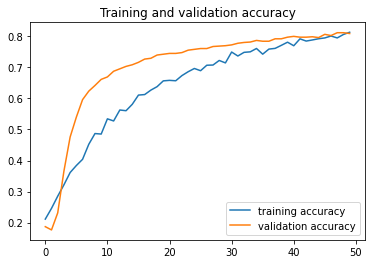

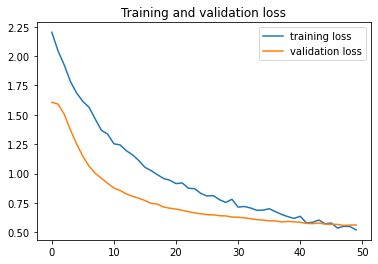

In [ ]:
## Accuracy and Loss plots

accuracy = vgg19_history.history['accuracy']
val_accuracy = vgg19_history.history['val_accuracy']
loss = vgg19_history.history['loss']
val_loss = vgg19_history.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

plt.plot(epochs, accuracy, label = 'training accuracy')
plt.plot(epochs, val_accuracy, label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot(epochs, loss, label = 'training loss')
plt.plot(epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')
plt.show()

In [ ]:
# Saving the best performing model and its weights for future use
model_vgg19.save('vgg19.h5')
model_vgg19.save_weights('vgg19_weights.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Loading VGG16
model_vgg19 = load_model('vgg19.h5')



Softmax Outputs: [[2.6664591e-05 3.9653073e-06 9.9965191e-01 2.9342518e-05 2.8818691e-04]]


Predicted_Label: rose


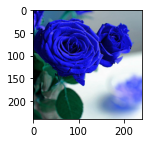

In [ ]:
plt.figure(figsize=[2, 2])

test_image = cv2.imread('/content/flowers/test/rose/16525204061_9b47be3726_m.jpg')
plt.imshow(test_image)

# Resize the image to 128X128 shape to be compatible with the model
test_image = cv2.resize(test_image,(128,128))

# If not compatible expand the dimensions to match with the Keras Input
test_image = np.expand_dims(test_image, axis = 0)
test_image = test_image*1/255.0

# Predict the result of the test image
y_pred = model_vgg19.predict(test_image)
print('\n')
print("Softmax Outputs:",y_pred)

# Convert the predicted probabilities to labels
labels = ['daisy', 'dandelion', 'rose',  'sunflower',  'tulip'] ## This i sthe order in which the dataset is read
for i in y_pred:
    for j, k in enumerate(i):
        if k == y_pred.max():
            print('\n')
            print('Predicted_Label:', labels[j])

In [ ]:
np.argmax(y_pred)

2